# Effect of shape and scale on the hazard function

This notebook shows how to use the `parametric` class to model the (log) hazard rates that can be generated from different shape/scale combinations for a univariate model. When calling `mdl.hazard`, the values of `x` can be set to ones so that the intercept acts as the scale parameter. Note that when the "scale" is set to -1, this is equivalent to $\lambda = exp(-1) \approx 0.37$.

In [1]:
# Load necessary modules
import numpy as np
import pandas as pd
import plotnine as pn
from paranet.models import parametric

# Example range of shape's for different scales
n_range = 25
t_range = np.linspace(0.25, 3, n_range)
x = np.ones(n_range)
scale_base = np.array([-1, 1, 3])
shape_seq1 = np.array([0.25,0.5,0.75,1,2,4])
shape_seq2 = np.array([-2,-1,0.5,0.5,1,2])
dists = ['exponential', 'weibull', 'gompertz']
holder = []
for scale in scale_base:
    for dist in dists:
        shape_seq = shape_seq1.copy()
        if dist == 'gompertz':
            shape_seq = shape_seq2.copy()
        for shape in shape_seq:
            alpha = np.atleast_2d([shape]*len(dists))
            beta = np.atleast_2d([scale]*len(dists))
            mdl = parametric(dists, alpha=alpha, beta=beta, add_int=False, scale_t=False, scale_x=False)
            df = pd.DataFrame(mdl.hazard(t=t_range, x=x),columns=dists)
            df = df.assign(scale=scale, shape=shape, t=t_range)
            holder.append(df)
res = pd.concat(holder).melt(['t','scale','shape'],var_name='dist',value_name='hazard')

The plot below shows that the (log) hazard is flat for the exponential distribution across time values (as expected), (roughly) linearly increasing or decreasing for the gompertz, and either convex or concave for the weibull depending on the shape parameter. High values of the scale parameter lead to a higher hazard for a given time value.

/Users/drysdaleerik/miniconda3/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


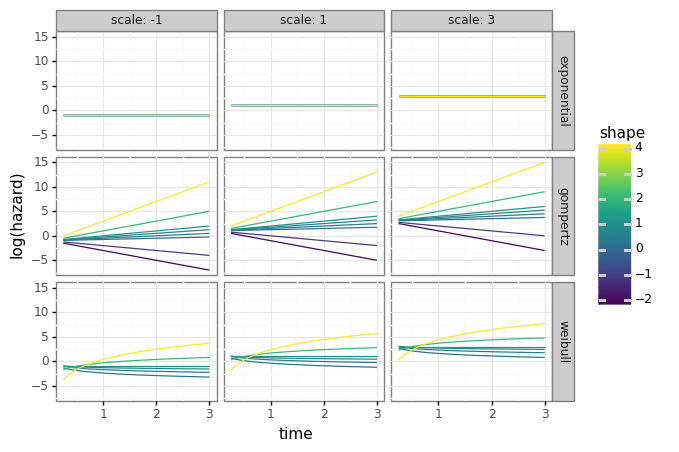

<ggplot: (8766557032114)>

In [2]:
gg_shape_scale = (pn.ggplot(res, pn.aes(x='t',y='np.log(hazard)',color='shape',group='shape')) + 
    pn.theme_bw() + pn.geom_line() + pn.labs(x='time',y='log(hazard)') + 
    pn.facet_grid('dist ~ scale',labeller=pn.labeller(scale=pn.label_both)))
gg_shape_scale